In [3]:
#Sebastian Russo

#Import necessary libraries
#Library to manipulate and analyze datasets 
import pandas as pd 

#------------------------------------------------------------------------------------------------
#Import Decision Tree model using the training set and required metrics
#Library to import only to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

#self-explanatory (model to be imported)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To import the class in for feature scaling (standardize the range of independent variables)
from sklearn.preprocessing import StandardScaler #COMPLETELY OPTIONAL

#From the metrics module, import accurracy, f1, precision, recall and classification report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
#------------------------------------------------------------------------------------------------
#Imports for Confusion Matrix and other data visualization
#Library to make python matplotlib work like MATLAB
import matplotlib.pyplot as plt  

#Library for confusion matrix visualization
from sklearn.metrics import confusion_matrix  

#Library for data visualization and correlation matrix
import seaborn as sns 

In [4]:
#Import data set
df_iris= pd.read_csv("Iris_dataset.csv",index_col=0) 
#Nothing else necessary since it is a .csv, has header and "," as delimiters
#index_col=0 to set the column at location 0 "ID" as the index for all rows

#View shape of dataset
print("Dataset shape:",df_iris.shape)

#Analyze dataset
df_iris.head(102)

#Needs to be checked for missing data, Categorical-Numerical conversion and Shuffling

Dataset shape: (150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
98,6.2,2.9,4.3,1.3,Iris-versicolor
99,5.1,2.5,3.0,1.1,Iris-versicolor
100,5.7,2.8,4.1,1.3,Iris-versicolor


In [5]:
#Check if there is any missing values in the data
num_missing_values=df_iris.isna().sum()

#Print to see the missing values
print(num_missing_values)

#No missing data

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
#Convert Categorical data from Species column into numerical variables
df_iris["Species"] = df_iris["Species"].map(
    {"Iris-setosa":0 , 
    "Iris-versicolor":1, 
    "Iris-virginica":2}
)

#Re-Analyze dataset
df_iris.head(102)

#Dataset is now fully numerical

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
98,6.2,2.9,4.3,1.3,1
99,5.1,2.5,3.0,1.1,1
100,5.7,2.8,4.1,1.3,1


In [7]:
#Shuffle the dataset to the maximum possible
df_iris = df_iris.sample(frac=1, random_state=42).reset_index(drop=True)

#Re-Re-analize dataset
df_iris.head(102)

#Now the order of dataset is completely shuffled and order bias is avoided

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
97,4.3,3.0,1.1,0.1,0
98,6.0,2.2,5.0,1.5,2
99,7.2,3.2,6.0,1.8,2
100,4.6,3.1,1.5,0.2,0


In [8]:
#Split dataset into features for independent and dependent 
independent_variable=df_iris.iloc[:,:4] #From SepalLengthCm to PetalWidthCm
dependent_variable=df_iris.iloc[:,-1] #Just Species

#Alternatives
#independent_variable=df_iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
#dependent_variable=df_iris[["Species"]]

#Check size for both 
print("Independent variables:",independent_variable.shape)

print("Dependent variables:",dependent_variable.shape)

Independent variables: (150, 4)
Dependent variables: (150,)


In [9]:
#Split the Independent and Dependent variables into training and 
#testing sets (80%, 20%), also reshuffle it again
independent_train, independent_test, dependent_train, dependent_test = train_test_split(
    independent_variable,
    dependent_variable,
    test_size=0.2, #20% of the dataset is for test, the rest 80% is train
    random_state=42
)

#Verify the shape for each split
print("independent_train set:",independent_train.shape)
print("independent_test set:",independent_test.shape)
print("dependent_train set:",dependent_train.shape)
print("dependent_test set:",dependent_test.shape)

independent_train set: (120, 4)
independent_test set: (30, 4)
dependent_train set: (120,)
dependent_test set: (30,)


In [10]:
#Feature scaling for better performance
#All features will be in the same scale
independent_train=StandardScaler().fit_transform(independent_train)
independent_test=StandardScaler().fit_transform(independent_test)

In [11]:
#Initialize the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(independent_train,dependent_train)

DecisionTreeClassifier()

In [12]:
#Predict the outcome
predicted_dependent= decision_tree_classifier.predict(independent_test)

#Check real values vs the predicted values
print("Actual values ",dependent_test.values[0:30])
print("Predict values",predicted_dependent[0:30])

Actual values  [2 1 1 0 2 0 1 1 0 0 1 0 1 1 2 0 2 1 1 0 0 2 2 0 2 1 0 2 1 0]
Predict values [2 1 1 0 2 0 1 1 0 0 1 0 2 1 2 0 2 1 1 0 0 2 2 0 2 1 0 2 1 0]


Simple confusion Matrix:
[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]


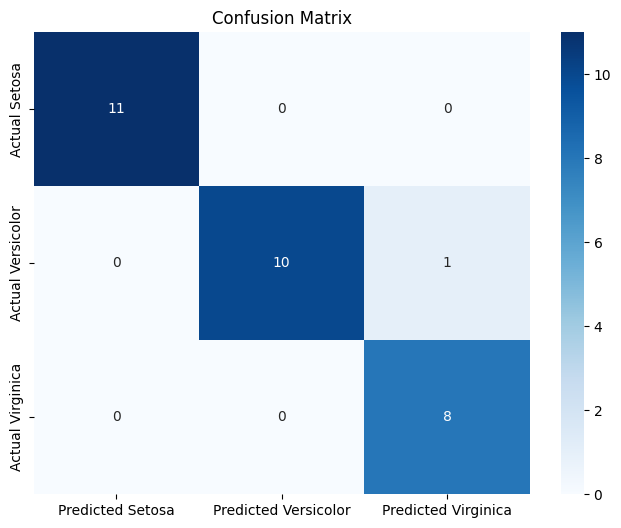

In [13]:
#Confusion matrix 
confusion_matrix = confusion_matrix(dependent_test, predicted_dependent)

#Print confusion matrix
print("Simple confusion Matrix:")
print(confusion_matrix)

#Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d',
            cmap='Blues',
            xticklabels=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'], 
            yticklabels=['Actual Setosa', 'Actual Versicolor', 'Actual Virginica'])
plt.title('Confusion Matrix')
plt.show()

In [14]:
#Check accuracy of this model (all same as Logistic regression)
accuracy= accuracy_score(dependent_test,predicted_dependent) #Ranges (0,1), the closer to 1 the better
print("Average accuracy: ",accuracy)

#Since this a multiclass (3) problems, use average="weighted" parameter to calculate 
#the metrics for each class separately then averages them
#Calculate precision
precision = precision_score(dependent_test, predicted_dependent, average='weighted')#Weighted by the number of true instances for each class
print("Weighted avg Precision:", precision)

#Calculate recall
recall = recall_score(dependent_test, predicted_dependent, average='weighted')#Weighted by the number of true instances for each class
print("Weighted avg Recall:", recall)

# Calculate F1 score
f1 = f1_score(dependent_test, predicted_dependent, average='weighted')#Weighted by the number of true instances for each class
print("Weighted avg F1 Score:", f1)

#Print the classification report
classification_report= classification_report(dependent_test,predicted_dependent)
print(classification_report)

Average accuracy:  0.9666666666666667
Weighted avg Precision: 0.9703703703703703
Weighted avg Recall: 0.9666666666666667
Weighted avg F1 Score: 0.9668534080298786
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.91      0.95        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



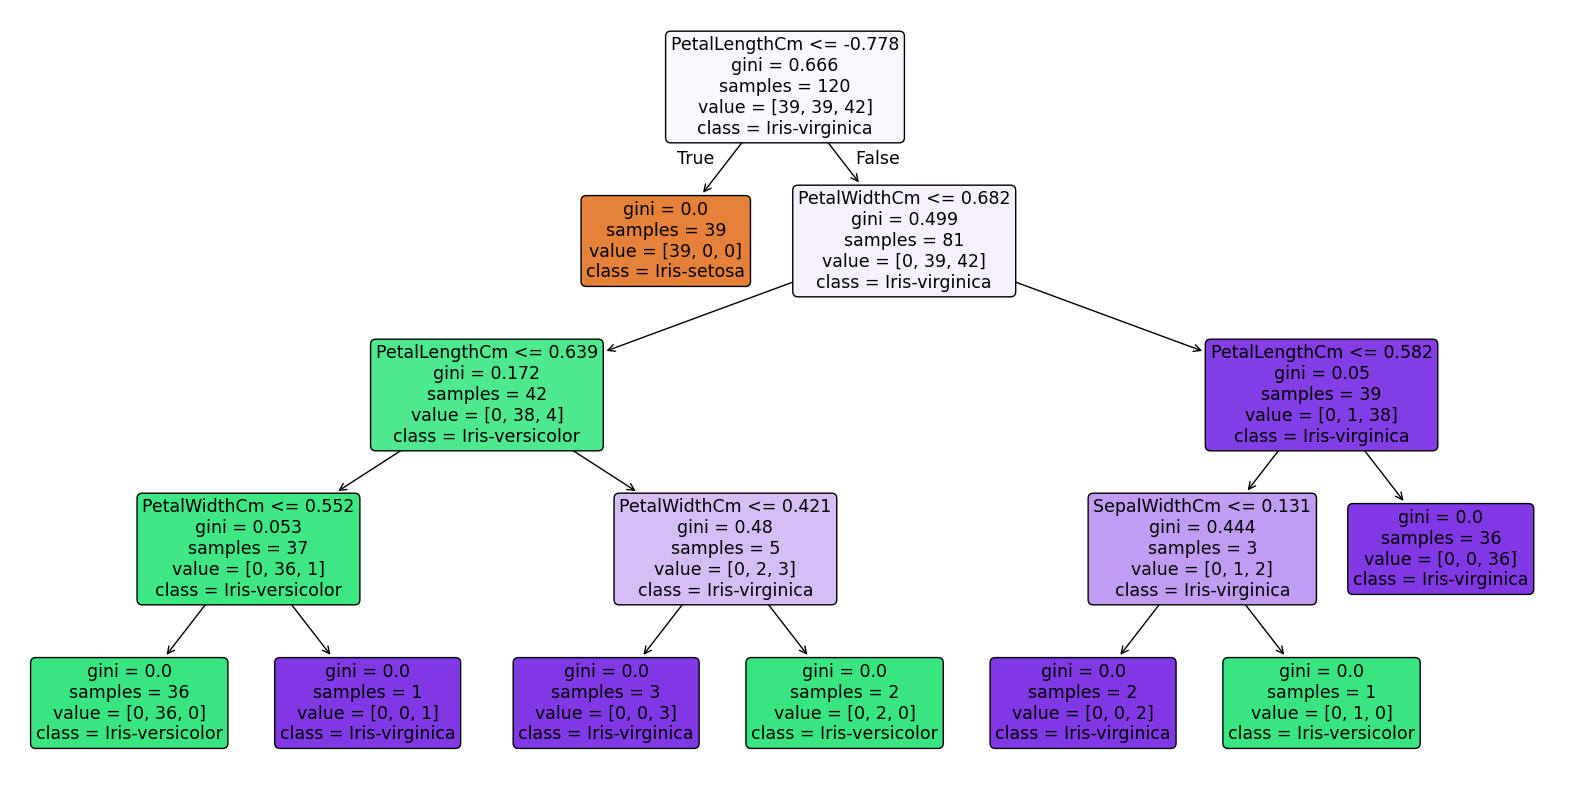

In [15]:
#Feature and classes names
features=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
classes=["Iris-setosa","Iris-versicolor","Iris-virginica"]

#Plot the decision tree for better resolution and show it 
plt.figure(figsize=(20,10))  # Increase the figure size to improve quality
tree.plot_tree(decision_tree_classifier, feature_names=features, class_names=classes,
        filled=True, rounded=True
)
plt.show()